In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np

import sys
sys.path.append("../../")
import src.soporte_clustering as sc
import src.soportefeaturescaling as sf

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("../../datos/raw/Global_Superstore.csv", encoding="latin-1", parse_dates=["Order Date", "Ship Date"])
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,Japan,NaN,APAC,North Asia,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,United States,77095.0,US,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,United States,93030.0,US,West,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,Brazil,NaN,LATAM,South,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


In [3]:
exploracion = sc.Exploracion(df)
exploracion.explorar_datos()

5 registros aleatorios:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
35943,38738,CA-2012-120446,2012-11-16,2012-11-18,First Class,JG-15805,John Grady,Corporate,San Diego,California,United States,92105.0,US,West,OFF-LA-10003148,Office Supplies,Labels,Avery 51,18.9000,3,0.00,8.6940,3.31,High
8917,12869,IT-2014-4453792,2014-02-14,2014-02-18,Standard Class,MC-17635,Matthew Clasen,Corporate,Bordeaux,Aquitaine,France,NaN,EU,Central,OFF-ST-10001974,Office Supplies,Storage,"Rogers File Cart, Industrial",382.3200,3,0.10,29.7000,37.64,Medium
17945,27605,IN-2013-53882,2013-09-19,2013-09-21,First Class,SW-20275,Scott Williamson,Consumer,Calamba,Calabarzon,Philippines,NaN,APAC,Southeast Asia,TEC-AC-10003861,Technology,Accessories,"Enermax Keyboard, Erganomic",134.0955,3,0.45,-82.9845,15.01,High
14055,18331,ES-2013-1032140,2013-03-11,2013-03-16,Standard Class,KM-16720,Kunst Miller,Consumer,Vienna,Vienna,Austria,NaN,EU,Central,OFF-BI-10001138,Office Supplies,Binders,"Acco 3-Hole Punch, Clear",295.8000,10,0.00,50.1000,21.59,Medium
6142,11688,ES-2012-1835271,2012-11-14,2012-11-14,Same Day,HJ-14875,Heather Jas,Home Office,Madrid,Madrid,Spain,NaN,EU,South,OFF-PA-10002652,Office Supplies,Paper,"Eaton Note Cards, Premium",239.2200,9,0.00,0.0000,55.07,High




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      5

,count,mean,min,25%,50%,75%,max,std
Row ID,51290.0,25645.5,1.0,12823.25,25645.5,38467.75,51290.0,14806.29199
Order Date,51290,2013-05-11 21:26:49.155781120,2011-01-01 00:00:00,2012-06-19 00:00:00,2013-07-08 00:00:00,2014-05-22 00:00:00,2014-12-31 00:00:00,NaN
Ship Date,51290,2013-05-15 20:42:42.745174528,2011-01-03 00:00:00,2012-06-23 00:00:00,2013-07-12 00:00:00,2014-05-26 00:00:00,2015-01-07 00:00:00,NaN
Postal Code,9994.0,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335
Sales,51290.0,246.490581,0.444,30.758625,85.053,251.0532,22638.48,487.565361
Quantity,51290.0,3.476545,1.0,2.0,3.0,5.0,14.0,2.278766
Discount,51290.0,0.142908,0.0,0.0,0.0,0.2,0.85,0.21228
Profit,51290.0,28.610982,-6599.978,0.0,9.24,36.81,8399.976,174.340972
Shipping Cost,51290.0,26.375915,0.0,2.61,7.79,24.45,933.57,57.296804




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994
Market,51290,7,APAC,11002
Region,51290,13,Central,11117




Número de valores nulos por columna:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Distribución de valores categóricos:

Columna: Order ID
Order ID
CA-2014-100111     14
MX-2014-166541     13
TO-2014-9950       13
NI-2014-8880       13
IN-2013-42311      13
                   ..
ID-2012-28402       1
CA-2011-154627      1
ES-2014-3877277     1
CA-2011-112403      1
US-2012-161347      1
Name: count, Length: 25035, dtype: int64

Columna: Ship Mode
Sh

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039078
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039078,-0.025449,0.768073,0.272649,-0.079056,0.354441,1.000000


In [4]:
(df.isnull().sum() / len(df)) * 100

Row ID             0.00000
Order ID           0.00000
Order Date         0.00000
Ship Date          0.00000
Ship Mode          0.00000
Customer ID        0.00000
Customer Name      0.00000
Segment            0.00000
City               0.00000
State              0.00000
Country            0.00000
Postal Code       80.51472
Market             0.00000
Region             0.00000
Product ID         0.00000
Category           0.00000
Sub-Category       0.00000
Product Name       0.00000
Sales              0.00000
Quantity           0.00000
Discount           0.00000
Profit             0.00000
Shipping Cost      0.00000
Order Priority     0.00000
dtype: float64

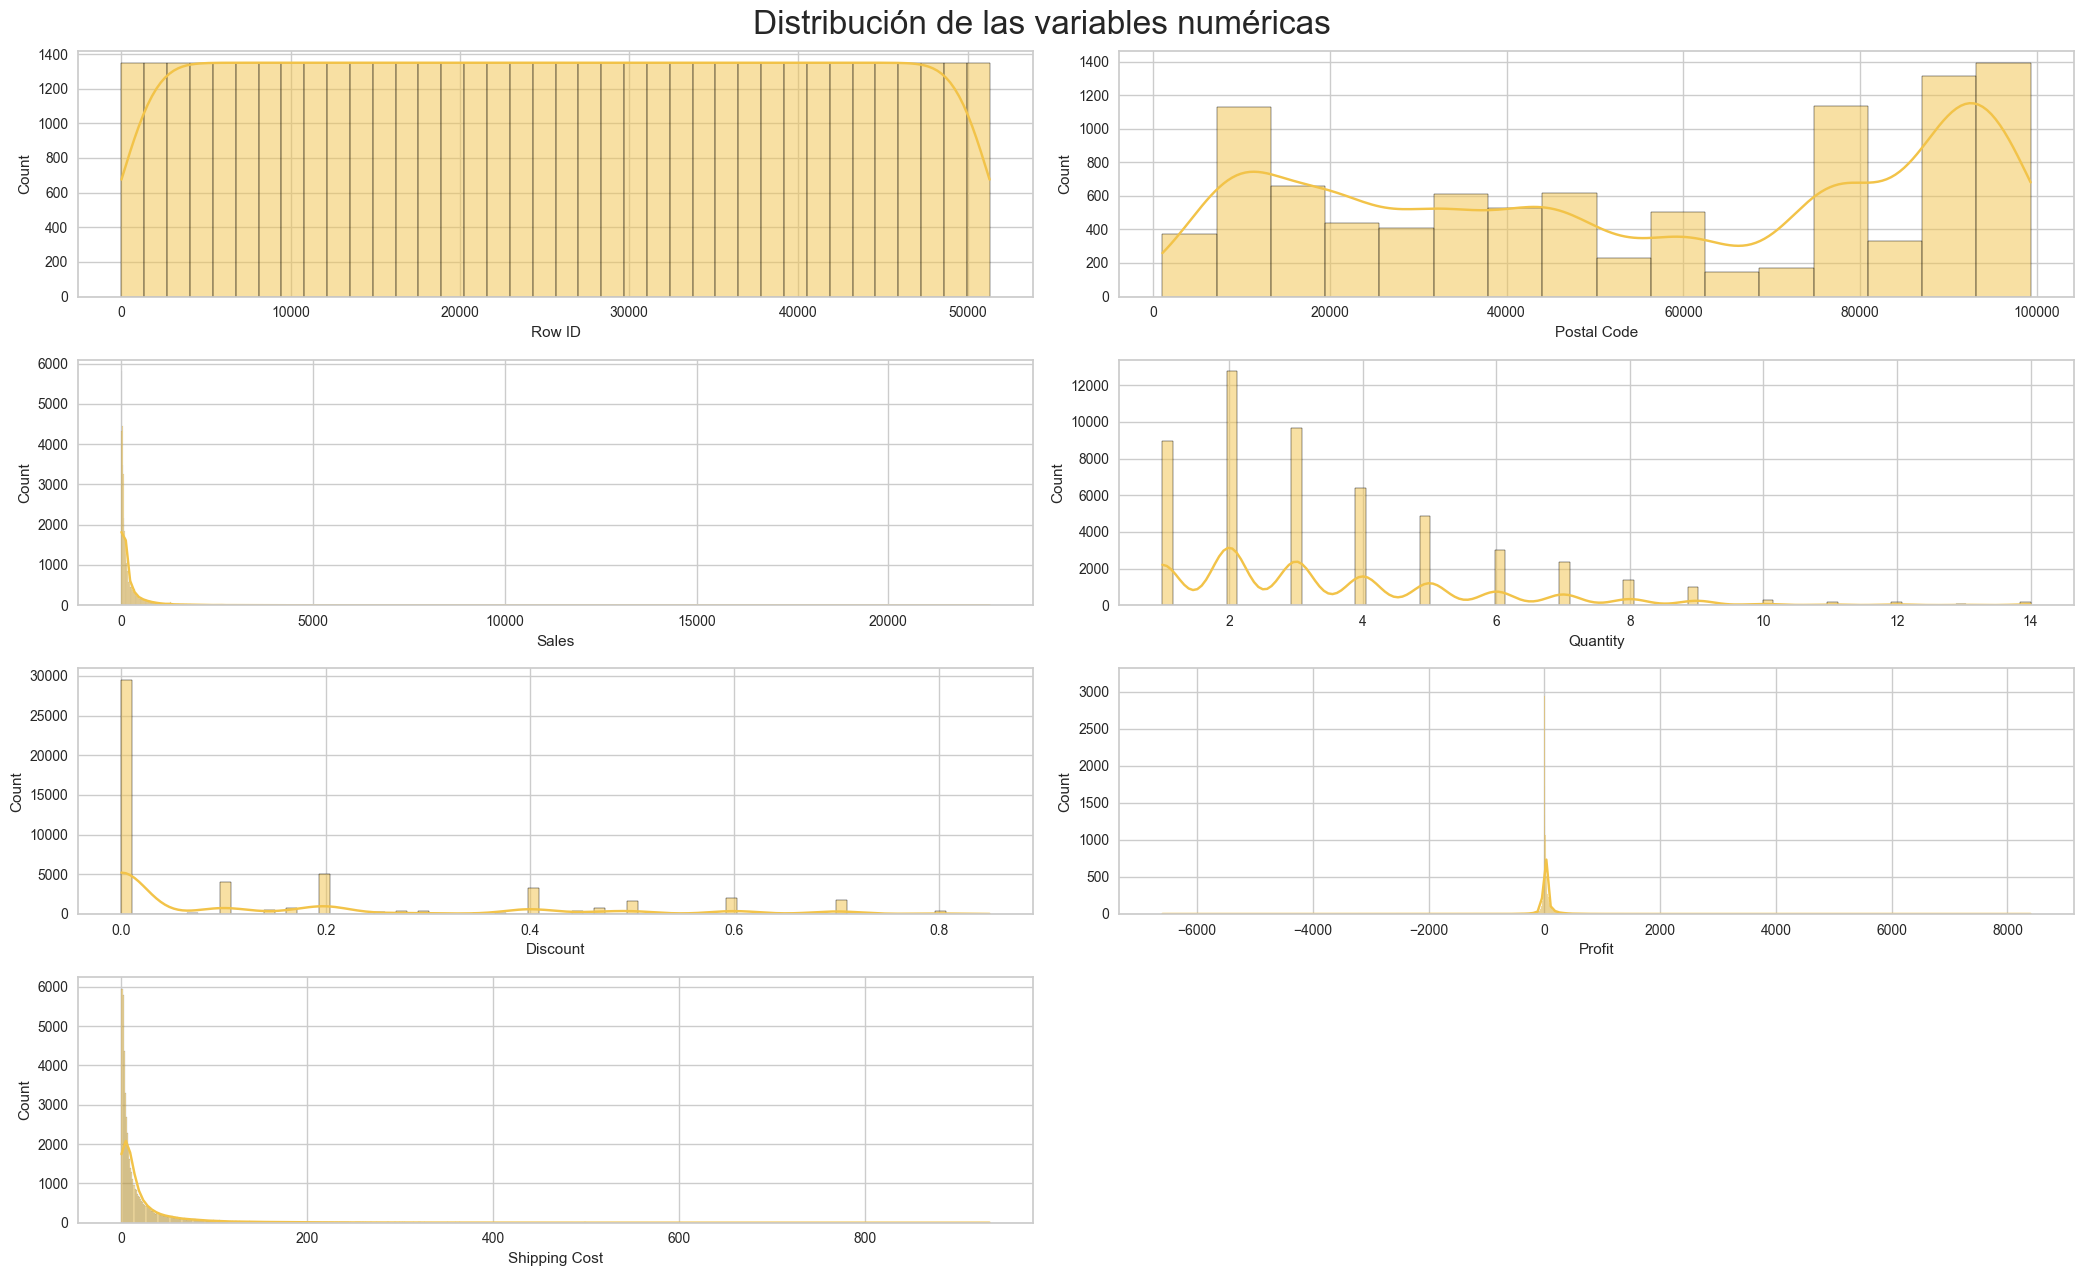

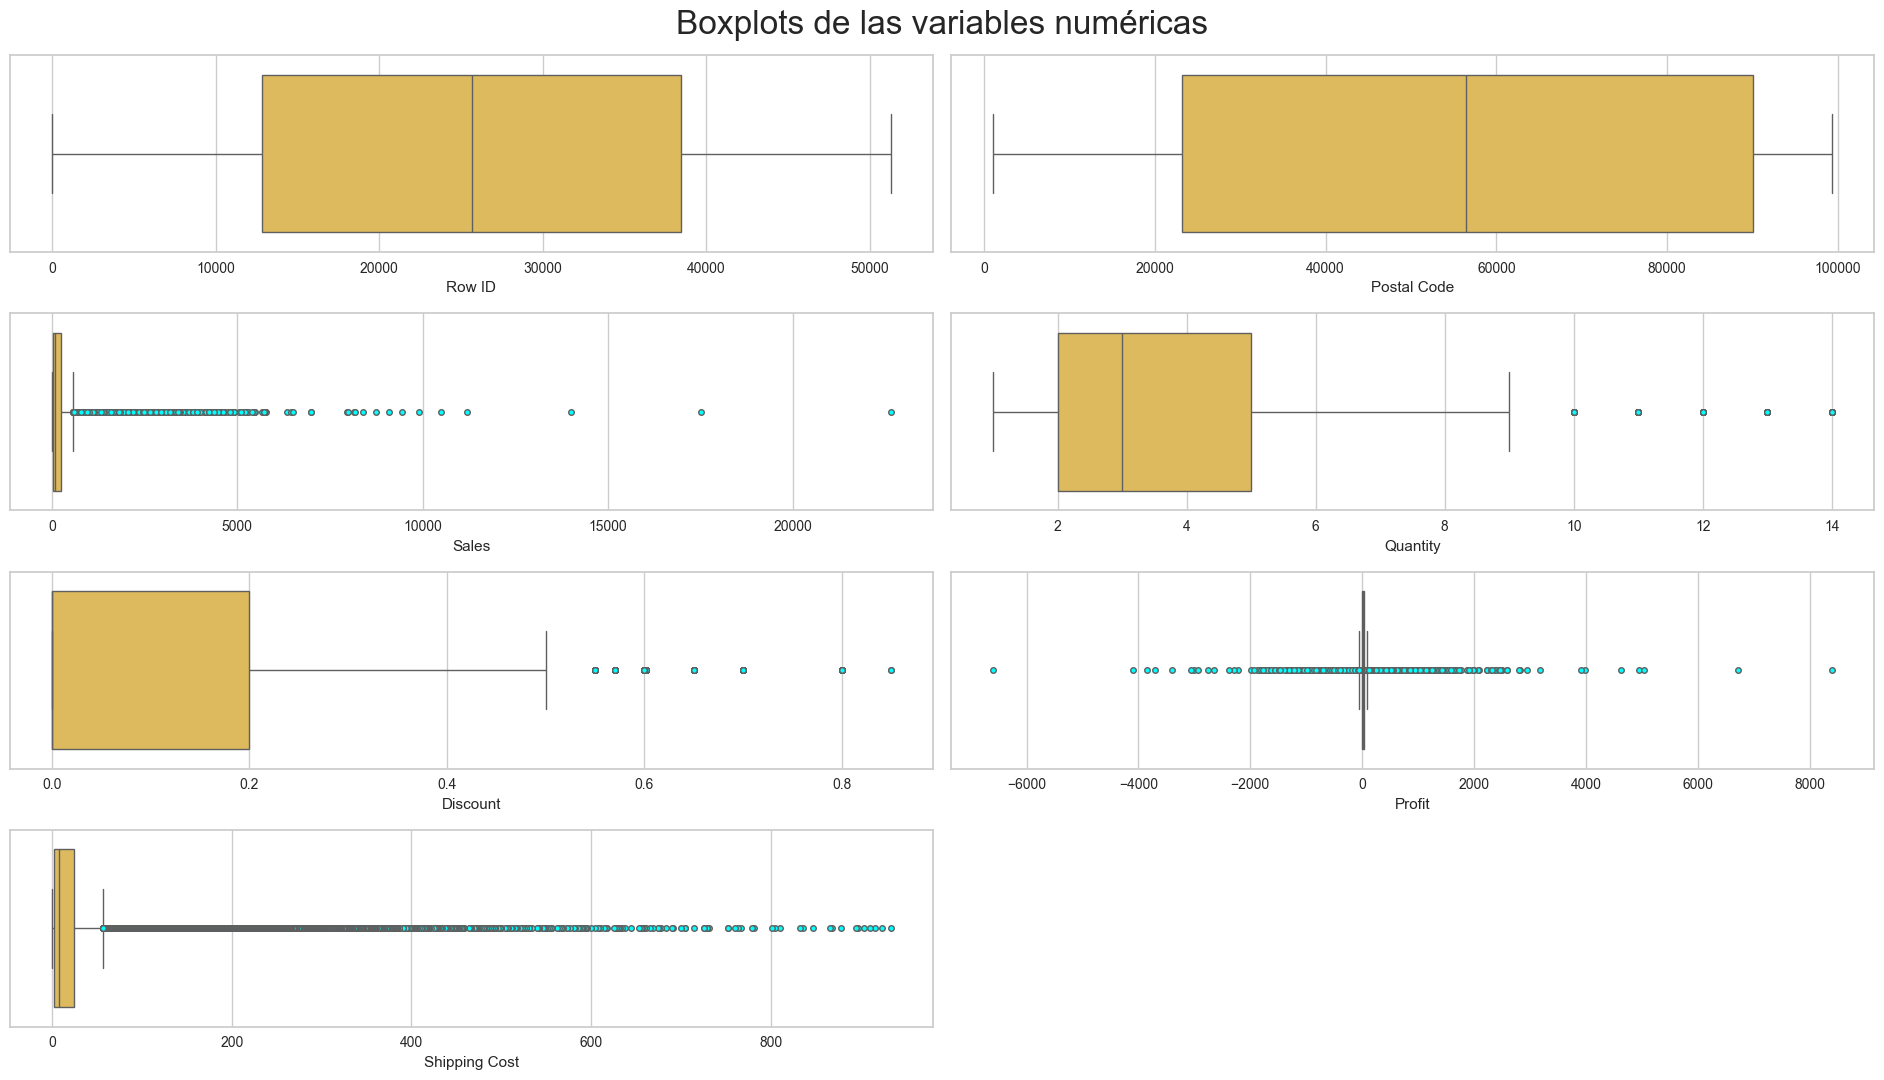

In [5]:
exploracion.visualizar_numericas()

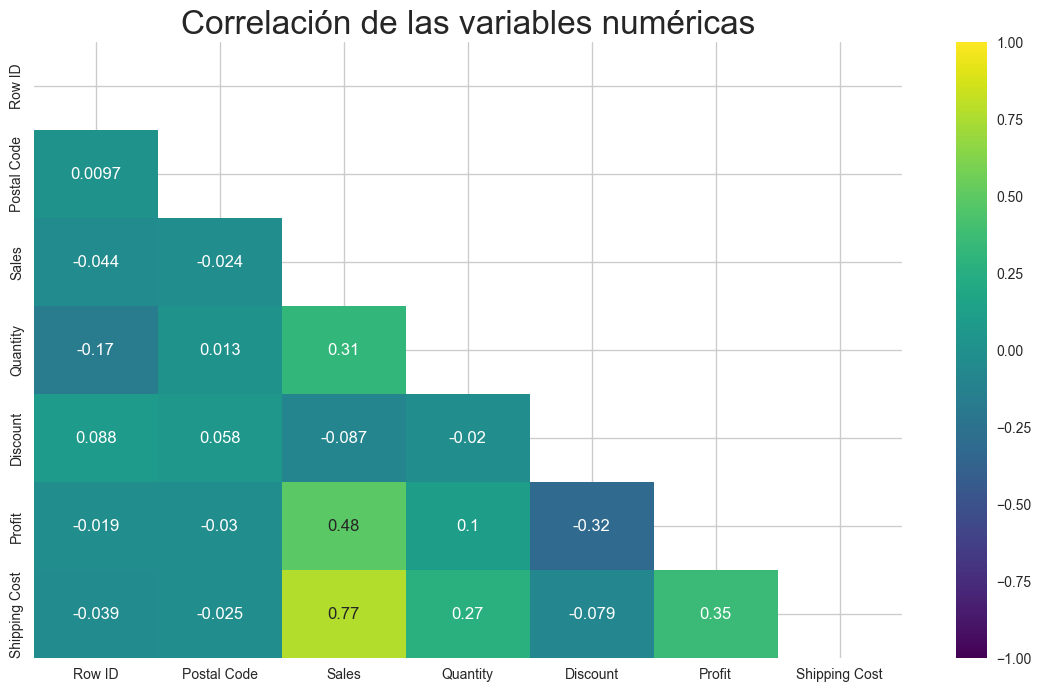

In [6]:
exploracion.correlacion()

- Podemos eliminar postal code porque tiene un 80% de nulos y Row ID porque no aporta valor. No sirve el Row ID en este caso. No podemos utilizarlo ni para ordenar ni para identificar porque ya tenemos customer ID

In [7]:
df_clientes = df.copy()

In [8]:
df_temp = df_clientes.drop(columns=["Customer ID"])
columnas_id = df_temp.filter(like="ID").columns
df_clientes.drop(columns=columnas_id, inplace=True)

columnas_name = df_clientes.filter(like="Name").columns
df_clientes.drop(columns=columnas_name, inplace=True)

In [9]:
df_clientes.drop(columns=["Postal Code", "City", "State", "Country", "Region", "Discount", "Profit", "Shipping Cost"], inplace = True)

In [10]:
df_clientes.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Segment',
       'Market', 'Category', 'Sub-Category', 'Sales', 'Quantity',
       'Order Priority'],
      dtype='object')

In [11]:
len(df_clientes.columns)

11

In [12]:
df_clientes.select_dtypes(np.number).columns

Index(['Sales', 'Quantity'], dtype='object')

In [13]:
df_clientes["Market"].unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [14]:
df_clientes.select_dtypes("O").columns

Index(['Ship Mode', 'Customer ID', 'Segment', 'Market', 'Category',
       'Sub-Category', 'Order Priority'],
      dtype='object')

In [15]:
df_clientes.set_index("Customer ID")

,Order Date,Ship Date,Ship Mode,Segment,Market,Category,Sub-Category,Sales,Quantity,Order Priority
Customer ID,,,,,,,,,,
RH-19495,2012-07-31,2012-07-31,Same Day,Consumer,US,Technology,Accessories,2309.650,7,Critical
JR-16210,2013-02-05,2013-02-07,Second Class,Corporate,APAC,Furniture,Chairs,3709.395,9,Critical
CR-12730,2013-10-17,2013-10-18,First Class,Consumer,APAC,Technology,Phones,5175.171,9,Medium
KM-16375,2013-01-28,2013-01-30,First Class,Home Office,EU,Technology,Phones,2892.510,5,Medium
RH-9495,2013-11-05,2013-11-06,Same Day,Consumer,Africa,Technology,Copiers,2832.960,8,Critical
...,...,...,...,...,...,...,...,...,...,...
KE-16420,2014-06-19,2014-06-19,Same Day,Corporate,APAC,Office Supplies,Fasteners,65.100,5,Medium
ZC-21910,2014-06-20,2014-06-24,Standard Class,Consumer,US,Office Supplies,Appliances,0.444,1,Medium
LB-16795,2013-12-02,2013-12-02,Same Day,Home Office,US,Office Supplies,Envelopes,22.920,3,High


# Encoding

In [16]:
encoding = sc.Preprocesado(df_clientes)
df_clientes = encoding.codificar()

# Estandarización

In [17]:
estandarizado = sf.FeatureScaling(df_clientes, df_clientes.select_dtypes(np.number).columns.to_list())
df_clientes = estandarizado.min_max_scaler()

In [18]:
df_clientes.to_pickle("../../datos/output/df_final.pickle")